In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [22]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# create engine to hawaii.sqlite
#engine = create_engine("sqlite:///hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [25]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [29]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).order_by(Measurement.date).all()
query
# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(query, columns=['Date', 'Precipitation']).sort_values(['Date'])
prec_df = prec_df.set_index("Date")
prec_df = prec_df.dropna(how='any')
prec_df.head()

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




Precipitation
Date                     
2016-08-23           0.00
2016-08-23           0.15
2016-08-23           0.05
2016-08-23           0.02
2016-08-23           1.79

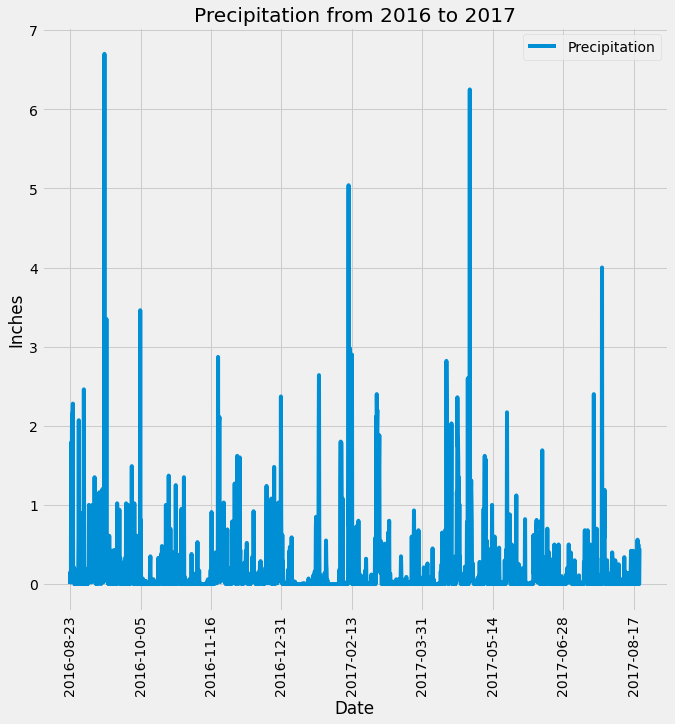

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_plot = prec_df.plot(rot = 90, ylabel='Inches', title=f'Precipitation from 2016 to 2017', figsize=(10, 10))
plt.savefig('precipitation_analysis.png')
plt.show()

# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).count()
print('station count:', station_count)

station count: 9


In [47]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_active = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
station_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_station = 'USC00519281'
most_station_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), 
func.avg(Measurement.tobs)).filter(Measurement.station == most_station).all()
print('[(low, high, average)] :',most_station_stats)

[(low, high, average)] : [(54.0, 85.0, 71.66378066378067)]


In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_station_year = session.query(Measurement.tobs).filter(Measurement.date >= last_year).filter(Measurement.station == most_station).all()
station_df = pd.DataFrame(most_station_year, columns=['Temperature'])
station_df.head()

Temperature
0         77.0
1         77.0
2         80.0
3         80.0
4         75.0

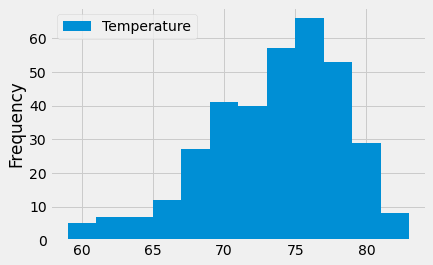

In [53]:
histogram = station_df.plot.hist(bins=12)
plt.savefig('StationTemps_Histogram.png')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()